# Notebook to Illustrate Handling, Calculation, and Plotting of DDC Trend File Data

This Notebook shows how to read and work with DDC Trend File data.  It utilizes a Siemens CSV Reader function that is found in the `ddc_readers` module to read the data into a Pandas DataFrame.  It then shows how to do some quick exploration and summarization of the data.  Next, some plotting techniques are shown.  Finally, calculation of new values is shown with specific emphasis on how deal with missing data and non-overlapping timestamps.

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import ddc_readers      # the module that has DDC trend file readers

# import matplotlib pyplot commands
import matplotlib.pyplot as plt
 
# Show Plots in the Notebook
%matplotlib inline

# Increase the size of plots and their fonts
plt.rcParams['figure.figsize']= (10, 8)   # set Chart Size
plt.rcParams['font.size'] = 14            # set Font size in Chart

# Use a plotting style'style' the plot using 'bmh' style
plt.style.use('bmh')

## Read in the DDC data into a Pandas Dataframe and Examine it

In [2]:
# The parameter in the function below controls whether the location of each 
# point is included in its point name.
df = ddc_readers.siemens_reader('data/siemens_sample.csv', include_location_in_point_name=False)

# Show the first 5 rows of the DataFrame
df.head()

,bh_100e_tec_room_temp,bh_100w_tec_rm_rh,bhmb_no2_w,bh_101_tec_rm_co2,bhmb_blr_hgr,bh_uhe_tec_rm_rh,bhmb_hrv01_en,bhmb_100_occ,bhmb_co_w,bh_100w_tec_htg_loopout,...,bh_102_tec_rm_rh,bhmb_101_occ,bh_uhe_tec_room_temp,bh_uhw_tec_htg_loopout,bh_101_tec_rm_rh,bh_uhe_tec_rm_co2,bh_100w_tec_rm_co2,bh_uhw_tec_rm_rh,bhmb_co_e,bhmb_hrv01_sat
2017-10-10 00:00:00,81.25,50.0,0.02,1000.0,188.78,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,306.0,1000.0,30.4,0.0,73.75
2017-10-10 00:15:00,81.25,50.0,0.01,1000.0,181.24,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,304.0,1000.0,30.4,0.0,73.78
2017-10-10 00:30:00,81.25,50.0,0.01,1000.0,179.66,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,307.0,1000.0,30.4,0.0,73.79
2017-10-10 00:45:00,81.50,50.0,0.02,1000.0,188.72,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,306.0,1000.0,30.4,0.0,73.80
2017-10-10 01:00:00,81.50,50.0,0.03,1000.0,181.39,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,308.0,1000.0,30.4,0.0,73.81


You can see that there is a separate column for each point.  The index of the DataFrame is the timestamps of the readings.  Some of the points don't have data for every possible timestamp, as indicated by the NaN values (these are Numpy.NaN values).

The `head` method can show how many every rows you want:

In [3]:
df.head(3)

,bh_100e_tec_room_temp,bh_100w_tec_rm_rh,bhmb_no2_w,bh_101_tec_rm_co2,bhmb_blr_hgr,bh_uhe_tec_rm_rh,bhmb_hrv01_en,bhmb_100_occ,bhmb_co_w,bh_100w_tec_htg_loopout,...,bh_102_tec_rm_rh,bhmb_101_occ,bh_uhe_tec_room_temp,bh_uhw_tec_htg_loopout,bh_101_tec_rm_rh,bh_uhe_tec_rm_co2,bh_100w_tec_rm_co2,bh_uhw_tec_rm_rh,bhmb_co_e,bhmb_hrv01_sat
2017-10-10 00:00:00,81.25,50.0,0.02,1000.0,188.78,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,306.0,1000.0,30.4,0.0,73.75
2017-10-10 00:15:00,81.25,50.0,0.01,1000.0,181.24,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,304.0,1000.0,30.4,0.0,73.78
2017-10-10 00:30:00,81.25,50.0,0.01,1000.0,179.66,31.2,NaN,NaN,0.0,0.0,...,50.0,NaN,71.25,0.0,50.0,307.0,1000.0,30.4,0.0,73.79


The `iloc` index locator approach also allows you to limit the number of columns shown.

In [4]:
# Here we will look at the first 5 rows and only the first 3 columns
# Note the use of square brackets, not parentheses!
df.iloc[:5, :3]

,bh_100e_tec_room_temp,bh_100w_tec_rm_rh,bhmb_no2_w
2017-10-10 00:00:00,81.25,50.0,0.02
2017-10-10 00:15:00,81.25,50.0,0.01
2017-10-10 00:30:00,81.25,50.0,0.01
2017-10-10 00:45:00,81.50,50.0,0.02
2017-10-10 01:00:00,81.50,50.0,0.03


In [5]:
# Look at the last 5 rows
df.tail()

,bh_100e_tec_room_temp,bh_100w_tec_rm_rh,bhmb_no2_w,bh_101_tec_rm_co2,bhmb_blr_hgr,bh_uhe_tec_rm_rh,bhmb_hrv01_en,bhmb_100_occ,bhmb_co_w,bh_100w_tec_htg_loopout,...,bh_102_tec_rm_rh,bhmb_101_occ,bh_uhe_tec_room_temp,bh_uhw_tec_htg_loopout,bh_101_tec_rm_rh,bh_uhe_tec_rm_co2,bh_100w_tec_rm_co2,bh_uhw_tec_rm_rh,bhmb_co_e,bhmb_hrv01_sat
2017-10-12 03:30:00,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 03:45:00,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 04:00:00,80.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 04:15:00,81.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-12 04:30:00,80.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Look at the last 5 rows, but only 3 columns.
# the -5 means start with the 5th row back from the end
df.iloc[-5:, :3]

,bh_100e_tec_room_temp,bh_100w_tec_rm_rh,bhmb_no2_w
2017-10-12 03:30:00,81.00,NaN,NaN
2017-10-12 03:45:00,81.00,NaN,NaN
2017-10-12 04:00:00,80.75,NaN,NaN
2017-10-12 04:15:00,81.00,NaN,NaN
2017-10-12 04:30:00,80.75,NaN,NaN


You can export the entire DataFrame to an Excel spreadsheet if you want.  When you look at the spreadsheet you see that the `bh_100e_tec_room_temp` point spans a greater range of date/times than the other points.  That is why you see so many NaN's at the end of this DataFrame.

In [7]:
df.to_excel('siemens.xlsx')

You can see the names of all the points present by looking at the `columns` attribute of the DataFrame.

In [8]:
df.columns

Index(['bh_100e_tec_room_temp', 'bh_100w_tec_rm_rh', 'bhmb_no2_w',
       'bh_101_tec_rm_co2', 'bhmb_blr_hgr', 'bh_uhe_tec_rm_rh',
       'bhmb_hrv01_en', 'bhmb_100_occ', 'bhmb_co_w', 'bh_100w_tec_htg_loopout',
       'bh_uhe_tec_heat_cool', 'bhmb_hrv01_spd', 'bh_102_tec_room_temp',
       'bh_100e_tec_heat_cool', 'bhmb_blr_hgs', 'bh_100e_tec_rm_co2',
       'bh_100e_tec_htg_loopout', 'bh_uhw_tec_heat_cool', 'bh_102_tec_rm_co2',
       'bh_uhw_tec_rm_co2', 'bhmb_cp1b_ss', 'bhmb_hrv01_oads',
       'bh_102_tec_heat_cool', 'bhmb_hrv01_eads', 'bhmb_hrv01_eat',
       'bh_100w_tec_room_temp', 'bh_100e_tec_rm_rh', 'bhmb_osat',
       'bh_102_tec_vlv_2_comd', 'bh_102_tec_htg_loopout', 'bhmb_euh_rmt',
       'bh_100w_tec_vlv_2_comd', 'bhmb_hrv01_pat', 'bh_101_tec_room_temp',
       'bh_101_tec_vlv_2_comd', 'bh_101_tec_heat_cool', 'bhmb_cp1a_ss',
       'bhmb_hrv01_phcv', 'bh_uhe_tec_htg_loopout', 'bhmb_no2_e',
       'bh_uhw_tec_room_temp', 'bh_101_tec_htg_loopout',
       'bh_100e_tec_vlv_2_

If you want to know how many different timestamps there are, you can use the `len` function on the DataFrame.  Remember that most DDC points do not have a value for every timestamp.

In [9]:
len(df)

209

The `describe()` method will give you statistical summaries for each column.  The `count` value shown below only counts the rows where there is actual data, not a NaN.  `describe()` only includes the numeric columns, so that is why there are fewer columns in this summary than the whole DataFrame.  Some of these DDC points have text values like 'On' and 'Off' or 'Heat' and 'Cool'.

In [10]:
df.describe()

,bh_100e_tec_room_temp,bh_100w_tec_rm_rh,bhmb_no2_w,bh_101_tec_rm_co2,bhmb_blr_hgr,bh_uhe_tec_rm_rh,bhmb_co_w,bh_100w_tec_htg_loopout,bhmb_hrv01_spd,bh_102_tec_room_temp,...,bhmb_hrv01_hcv,bh_102_tec_rm_rh,bh_uhe_tec_room_temp,bh_uhw_tec_htg_loopout,bh_101_tec_rm_rh,bh_uhe_tec_rm_co2,bh_100w_tec_rm_co2,bh_uhw_tec_rm_rh,bhmb_co_e,bhmb_hrv01_sat
count,195.000000,101.0,101.000000,101.0,101.000000,101.000000,101.0,101.0,101.0,101.000000,...,100.0,101.0,101.000000,101.0,101.0,101.000000,101.0,101.000000,101.0,101.000000
mean,80.608974,50.0,0.021386,1000.0,181.250495,32.578218,0.0,0.0,18.0,69.821782,...,0.0,50.0,70.856436,0.0,50.0,313.702970,1000.0,31.695050,0.0,73.243564
std,0.899232,0.0,0.012809,0.0,6.537937,0.905936,0.0,0.0,0.0,0.750280,...,0.0,0.0,0.260640,0.0,0.0,6.042424,0.0,0.867453,0.0,0.813843
min,74.000000,50.0,0.000000,1000.0,153.420000,31.200000,0.0,0.0,18.0,69.000000,...,0.0,50.0,70.250000,0.0,50.0,302.000000,1000.0,30.400000,0.0,71.820000
25%,80.500000,50.0,0.010000,1000.0,177.790000,31.200000,0.0,0.0,18.0,69.250000,...,0.0,50.0,70.750000,0.0,50.0,309.000000,1000.0,30.400000,0.0,72.630000
50%,80.750000,50.0,0.020000,1000.0,181.740000,32.800000,0.0,0.0,18.0,69.500000,...,0.0,50.0,70.750000,0.0,50.0,314.000000,1000.0,32.000000,0.0,73.090000
75%,81.000000,50.0,0.030000,1000.0,186.310000,33.200000,0.0,0.0,18.0,71.000000,...,0.0,50.0,71.250000,0.0,50.0,318.000000,1000.0,32.400000,0.0,73.940000
max,81.500000,50.0,0.050000,1000.0,191.550000,33.600000,0.0,0.0,18.0,71.250000,...,0.0,50.0,71.250000,0.0,50.0,324.000000,1000.0,32.800000,0.0,74.860000


## Plotting the Data

Pandas provides a number of plotting functions, which really access Matplotlib plotting functions under the hood.  Here is how you would plot a couple columns using the Pandas plotting functions:

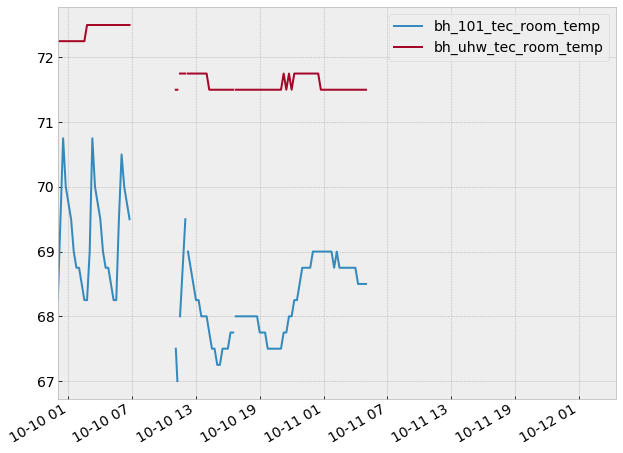

In [11]:
df[['bh_101_tec_room_temp', 'bh_uhw_tec_room_temp']].plot()

I'll address the gap problems in a moment.  Notice that you need to use double square brackets to select out particular columns in the DataFrame.  Here is how you would implement the above graph through use of Matplotlib function calls.  The values to use for the X axis are the date/times in the index of the DataFrame:

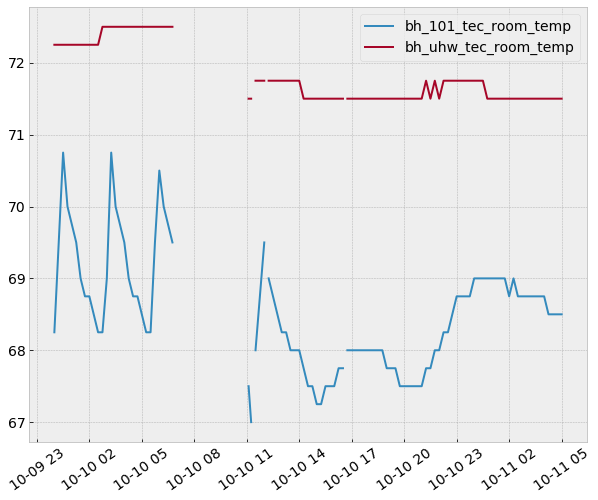

In [12]:
plt.plot(df.index, df.bh_101_tec_room_temp, label='bh_101_tec_room_temp')
plt.plot(df.index, df.bh_uhw_tec_room_temp, label='bh_uhw_tec_room_temp')
plt.xticks(rotation=35)
plt.legend()

This is more complicated, but sometimes you need the flexibility of Matplotlib to accomplish what you need.  So, it is good to know both methods. Also, you can mix Pandas plotting function with Matplotlib functions in the same plot. I'll stick to Pandas plotting calls for the rest of the tutorial.

### Eliminating the Gaps in the Lines

The gaps in the lines are caused by the fact that there are NaN values scattered through out the data.  These occur because the timestamps for each sensor point are not exactly the same as the timestamps for other sensors.  In the graph above, some sensor has values on October 10 near 8 am, but the two sensors we are plotting do not have values then.  To have these gaps spanned by a connecting line, you can drop out the NaN values before plotting using the `dropna()` method:

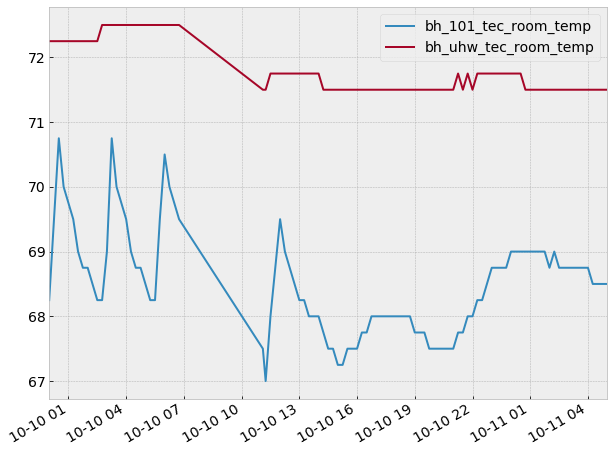

In [13]:
df.bh_101_tec_room_temp.dropna().plot(legend=True)
df.bh_uhw_tec_room_temp.dropna().plot(legend=True)

Note that I had to use the `legend=True` parameter in the plot call because when Pandas plots one series, it defaults to not showing a legend.  I had to plot the series separately because the NaN values for each series may not occur at the same set of timestamps, so separate `dropna()` calls are needed on each series.

If you have a number of columns you want to plot, you can write a loop to simplify the code.  The code below first creates a list of colummns to plot and then loops through to plot each one individually.  The list is generated by finding every sensor point that has "temp" in its name using a Python "list comprehension".

In [14]:
temp_pts = [col for col in df.columns if 'temp' in col]
temp_pts

['bh_100e_tec_room_temp',
 'bh_102_tec_room_temp',
 'bh_100w_tec_room_temp',
 'bh_101_tec_room_temp',
 'bh_uhw_tec_room_temp',
 'bh_uhe_tec_room_temp']

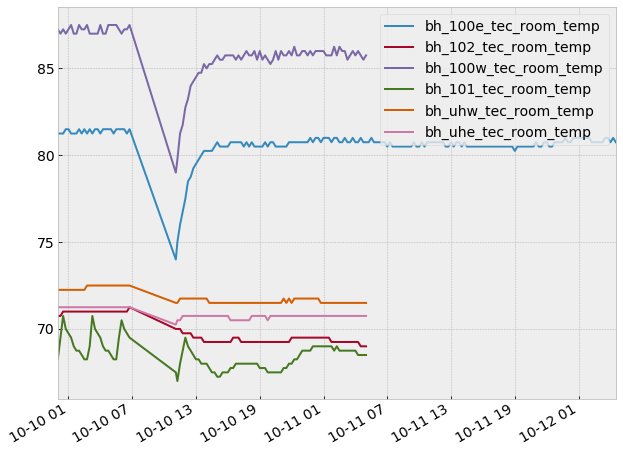

In [15]:
for pt in temp_pts:
    df[pt].dropna().plot(legend=True)
    plt.legend(loc='upper right')    # mixed in a Matplotlib command

## Dealing with NaN's in Calculated Values

This section will address how to perform calculations with the point data but deal with the fact that the timestamps of the sensors are not always aligned.  For purposes of instruction, I'll create a DataFrame with two sensors that have obvious misalignment of the timestamps.  The first sensor will be the actual sensor `bh_100w_tec_room_temp`, which generally has 15 minute spacing between points, and the second sensor will be fabricated with some random values but with 5 minute spacing.

In [16]:
# Select out the bh_100w_tec_room_temp sensor, drop the NaNs, 
# and give the column a shorter name.
df_t1 = df[['bh_100w_tec_room_temp']].dropna()
df_t1.columns = ['temp1']                    # rename column
df_t1.head()

,temp1
2017-10-10 00:00:00,87.25
2017-10-10 00:15:00,87.00
2017-10-10 00:30:00,87.25
2017-10-10 00:45:00,87.00
2017-10-10 01:00:00,87.25


In [17]:
# Create an index for the fabricated sensor that spans the time range
# of temp1 but has 5 minute spacing.
start_ts = df_t1.index[0]      # first timestamp in df_t1
end_ts = df_t1.index[-1]       # last timestamp in df_t1
fab_index = pd.date_range(start_ts, end_ts, freq='5Min')
fab_index

DatetimeIndex(['2017-10-10 00:00:00', '2017-10-10 00:05:00',
               '2017-10-10 00:10:00', '2017-10-10 00:15:00',
               '2017-10-10 00:20:00', '2017-10-10 00:25:00',
               '2017-10-10 00:30:00', '2017-10-10 00:35:00',
               '2017-10-10 00:40:00', '2017-10-10 00:45:00',
               ...
               '2017-10-11 04:15:00', '2017-10-11 04:20:00',
               '2017-10-11 04:25:00', '2017-10-11 04:30:00',
               '2017-10-11 04:35:00', '2017-10-11 04:40:00',
               '2017-10-11 04:45:00', '2017-10-11 04:50:00',
               '2017-10-11 04:55:00', '2017-10-11 05:00:00'],
              dtype='datetime64[ns]', length=349, freq='5T')

In [18]:
# Create random temperature values, normally distributed, with a mean
# of 71.0 and a standard deviation of 3.0
vals = np.random.normal(71.0, 3.0, size=len(fab_index))

# make a new DataFrame with these values and the prior index
df_fab = pd.DataFrame(vals, index=fab_index, columns=['temp2'])
df_fab.head()

,temp2
2017-10-10 00:00:00,72.420794
2017-10-10 00:05:00,73.827610
2017-10-10 00:10:00,73.291292
2017-10-10 00:15:00,69.191258
2017-10-10 00:20:00,69.168449


In [19]:
# Combine the two DataFrames horizontally to make the final DataFrame
# that we will work with in this section
df_final = pd.concat([df_t1, df_fab], axis=1)
df_final.head(6)

,temp1,temp2
2017-10-10 00:00:00,87.25,72.420794
2017-10-10 00:05:00,NaN,73.827610
2017-10-10 00:10:00,NaN,73.291292
2017-10-10 00:15:00,87.00,69.191258
2017-10-10 00:20:00,NaN,69.168449
2017-10-10 00:25:00,NaN,69.041880


So, let's say we want to calculate the temperature difference between temp1 and temp2 and create a new column with that value.  We can just do the calculation like the following:

In [20]:
df1 = df_final.copy()     # make a copy of the DataFrame to work with in this example
df1['temp_diff'] = df1.temp1 - df1.temp2
df1.head(6)

,temp1,temp2,temp_diff
2017-10-10 00:00:00,87.25,72.420794,14.829206
2017-10-10 00:05:00,NaN,73.827610,NaN
2017-10-10 00:10:00,NaN,73.291292,NaN
2017-10-10 00:15:00,87.00,69.191258,17.808742
2017-10-10 00:20:00,NaN,69.168449,NaN
2017-10-10 00:25:00,NaN,69.041880,NaN


But, the temperature difference is only calculated at timestamps that are common to both sensors.  The temp2 data at intervening timestamps has no influence on the calculation, so that information is totally neglected.  This type of problem is very bad with wireless sensors that are not coordinated at all in when they report data; there could be no overlapping timestamps between two wireless sensors.

There are at least two reasonable ways to deal with the problem.  First, you can average the data points into long enough intervals such that all the sensors have at least one data point in the interval.  For this example, we can average the data into 15 minute intervals using the Pandas `resample` function:

In [21]:
df2 = df_final.copy()     # make a copy of the DataFrame to work with in this example
df2 = df2.resample('15min').mean()
df2.head()

,temp1,temp2
2017-10-10 00:00:00,87.25,73.179899
2017-10-10 00:15:00,87.00,69.133862
2017-10-10 00:30:00,87.25,72.241514
2017-10-10 00:45:00,87.00,70.946824
2017-10-10 01:00:00,87.25,72.474898


Each column is averaged into 15 minute intervals, and those intervals have a common timestamp (you can affect where that timestamp is located in the interval using the `label` and `loffset` parameters of resample).  All of the `temp2` values are used to come up with the average values for that sensor, so no data points are being thrown away.  You now can subtract the two columns in the same way as before:

In [22]:
df2['temp_diff'] = df2.temp1 - df2.temp2
df2.head()

,temp1,temp2,temp_diff
2017-10-10 00:00:00,87.25,73.179899,14.070101
2017-10-10 00:15:00,87.00,69.133862,17.866138
2017-10-10 00:30:00,87.25,72.241514,15.008486
2017-10-10 00:45:00,87.00,70.946824,16.053176
2017-10-10 01:00:00,87.25,72.474898,14.775102


That's a pretty good solution in many situations. Sometimes, though, you would like to keep a higher time-resolution for your final DataFrame. To do this, instead of averaging the sensors, you can interpolate the values to fill in those timestamps that contain NaN's.  In this example, no NaN's appear for temp2, so we don't need to interpolate that sensor, but we do need to interpolate temp1:

In [23]:
df3 = df_final.copy()     # make a copy of the DataFrame to work with in this example
df3.temp1.interpolate(inplace=True)
# inplace=True saves me from having to do:  df3.temp1 = df3.temp1.interpolate()
df3.head()

,temp1,temp2
2017-10-10 00:00:00,87.250000,72.420794
2017-10-10 00:05:00,87.166667,73.827610
2017-10-10 00:10:00,87.083333,73.291292
2017-10-10 00:15:00,87.000000,69.191258
2017-10-10 00:20:00,87.083333,69.168449


A linear interpolation was used to fill in the missing temp1 values.  Other types of interpolation are available with the Pandas `interpolate` function.  Now we can do the subtraction:

In [24]:
df3['temp_diff'] = df3.temp1 - df3.temp2
df3.head()

,temp1,temp2,temp_diff
2017-10-10 00:00:00,87.250000,72.420794,14.829206
2017-10-10 00:05:00,87.166667,73.827610,13.339056
2017-10-10 00:10:00,87.083333,73.291292,13.792042
2017-10-10 00:15:00,87.000000,69.191258,17.808742
2017-10-10 00:20:00,87.083333,69.168449,17.914885


You can compare the results of these approaches in the following graph.  The first hour of data is shown.

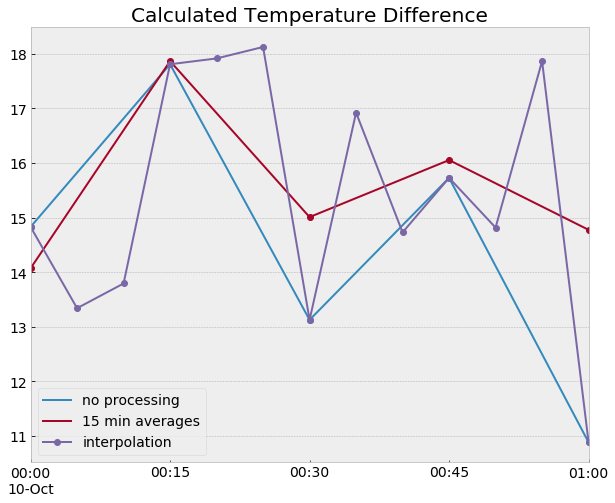

In [25]:
df1.loc[:'2017-10-10 1:00:00', 'temp_diff'].dropna().plot(legend=True, marker='o', label='no processing')
df2.loc[:'2017-10-10 1:00:00', 'temp_diff'].plot(legend=True, marker='o', label='15 min averages')
df3.loc[:'2017-10-10 1:00:00', 'temp_diff'].plot(legend=True, marker='o', label='interpolation')
plt.title('Calculated Temperature Difference');